# Natural Language Processing Hotel Review 2

### Analyst: Spencer Cox
#### Date: June 13, 2022
#### Brainstation Data Science Bootcamp

The objective is to create a model that can predict customer ratings of hotel stays in Western European cities. The indepenent variables used to model customer ratings include but are not limited to hotel names, information on the the travelers, and an analysis of customer feedback about their stay. We will use a range of machine-learning models, explore the hyperparameters of each model, and fine-tune the models to generate optimized prediction models.

The dataset to be used for the analysis was cleaned and preprocessed in assignment one of the NLP Hotel Review project. 

We will begin with loading in the training and test datasets to develop some initial familiarity with the dependent variables.



In [2]:
# Import our basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load train and test datasets
df_train = pd.read_csv('Data/clean_train_dataframe.csv')
df_test = pd.read_csv('Data/clean_test_dataframe.csv')

In [5]:
# Shape of the datasets
print(f'The training dataframe has {df_train.shape[0]} rows and {df_train.shape[1]} columns.')
print(f'The test dataframe has {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

The training dataframe has 12798 rows and 2744 columns.
The test dataframe has 4267 rows and 2744 columns.


In [6]:
# Percent of rows in the test dataframe out of the total
print(f'The test dataframe is based on a {round(df_test.shape[0]/(df_train.shape[0]+df_test.shape[0])*100)}% split.')

The test dataframe is based on a 25% split.


In [7]:
#Target variable column stored in binary, with 1 being a good review and 0 being a bad review
ratings = df_train['rating'].value_counts()

print(f'Bad ratings are {round(ratings[0]/(ratings[0]+ratings[1])*100, 2)}% of the total amount of ratings.')

Bad ratings are 42.39% of the total amount of ratings.


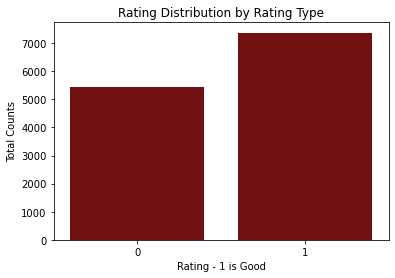

In [7]:
# visualize proportion of values to see if balanced
sns.barplot(x = ratings.index, y = ratings.values, color = 'maroon')
plt.xlabel('Rating - 1 is Good')
plt.ylabel('Total Counts')
plt.title('Rating Distribution by Rating Type')
plt.show()


There is sufficient balance between good and bad reviews to not require adjustment to our target variable by up or down sampling. For more significant exploratory data analysis, see part I. 

Since we will be using the same dependent and independent variables across all tests, I will split the data now into our X, or independent variable us to predict y, our dependent `review` variable. 



In [8]:
#Isolate dependent and independent variables from the training and test dataset
X_train = df_train.drop('rating', axis=1)
y_train = df_train['rating']

X_test = df_test.drop('rating', axis=1)
y_test = df_test['rating']



In [9]:
# Ensure  the independent variable column was dropped in both train and test sets
print(df_train.shape)
print(X_train.shape)
print(y_train.shape)
print(df_test.shape)
print(X_test.shape)
print(y_test.shape)

(12798, 2744)
(12798, 2743)
(12798,)
(4267, 2744)
(4267, 2743)
(4267,)


We will now move into the modeling component of the exercise.

## Question 1: Employing a Logistic Regression Model.

In this section, we will employ a logistic model. In training the model, we will follow convention for logistic regression and not scale the data. We will fit the model on the train split, and test for accuracy on the testing set.   

Then, we will identify which 20 words were most predictive of a good review from the positive review column, and the 20 words that contributed most to a bad revew from the negative comment column.

We then will seek to fine-tune our model by reducing the dimensionality of the dataset using PCA. Prior to performing PCA, we will scale our data. In this process, we will be exploring the relationship between the number of dimensions and run-time for a logistic regression. Finally we will have a short discussion about the advantages or disadvantages of dimensionality reduction.

#### Fit a Logistic Regression Model

We will instantiate our logistic model useing a limite-memory BFGS solver (lbfgs), which helps our computational efficiency. We will then test our model to find the accuracy score on our test set.

In [13]:
# Instatiate logistic model
logreg = LogisticRegression(solver='lbfgs')

# Fit log regression model to the training data
logreg.fit(X_train, y_train)

# Score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.7238631036099391
Test score: 0.7187719709397703


The basic logistic model had an accuracy test score of 71.9%. 

Next, we will identify the 20 words most predictive of a good review from the positive review column, and the 20 words most predictive of a bad review using the regression coefficeints. We will have to extract features from our dataframe and join them into a new dataframe with our coefficient results.

In [11]:
#extract features from our X_train df
features = list(X_train.columns.values)


In [12]:
#Create new dataframe with a coefficient column and a matching features column. 
#The coefficient array follows the same order as the training set.

logreg_coefficients = pd.DataFrame({'coefficient': logreg.coef_[0], 'variable': features})  
logreg_coefficients.head()

,coefficient,variable
0,0.000455,Additional_Number_of_Scoring
1,0.075984,Average_Score
2,-0.046908,Review_Total_Negative_Word_Counts
3,-0.000162,Total_Number_of_Reviews
4,0.044742,Review_Total_Positive_Word_Counts


In [13]:
#Take a glimpse at the most impactful variables
logreg_coefficients_rank = logreg_coefficients.sort_values(by = 'coefficient', ascending = False)
# Explore most positive coefficients
logreg_coefficients_rank.head(25)

,coefficient,variable
1,0.075984,Average_Score
4,0.044742,Review_Total_Positive_Word_Counts
1242,0.026697,p_staff
2189,0.024221,n_negative
417,0.022253,p_
2208,0.016465,n_nothing
733,0.015974,p_excellent
16,0.015947,trip_leisure
946,0.012578,p_lovely
822,0.011976,p_great


In [14]:
# most negative coefficients - Stay away from the Britannia International Hotel!
logreg_coefficients_rank.tail(25)

,coefficient,variable
2617,-0.003466,n_tiny
1481,-0.003777,n_air
2188,-0.003852,n_need
2200,-0.003995,n_noise
1013,-0.004644,p_nice
2619,-0.004772,n_tire
2732,-0.004936,n_work
2468,-0.005639,n_shower
2202,-0.005911,n_noisy
53,-0.006409,Hotel_Name_Britannia International Hotel Canar...


In [15]:
# Extract all coefficients from negative reviews column and sort them
negreviews_coef = logreg_coefficients.loc[logreg_coefficients['variable'].str.startswith('n_')]

negreviews_coef = negreviews_coef.sort_values(by = 'coefficient', ascending = True)
negreviews_coef.head(20)

,coefficient,variable
2416,-0.036029,n_room
1400,-0.031435,n_
2495,-0.014904,n_small
1559,-0.010171,n_bed
2533,-0.007974,n_staff
1554,-0.007788,n_bathroom
2297,-0.006962,n_poor
2202,-0.005911,n_noisy
2468,-0.005639,n_shower
2732,-0.004936,n_work


In [16]:
# Extract all coefficients from positive reviews column and sort them
posreviews_coef = logreg_coefficients.loc[logreg_coefficients['variable'].str.startswith('p_')]

posreviews_coef = posreviews_coef.sort_values(by = 'coefficient', ascending = False)
posreviews_coef.head(20)

,coefficient,variable
1242,0.026697,p_staff
417,0.022253,p_
733,0.015974,p_excellent
946,0.012578,p_lovely
822,0.011976,p_great
792,0.011512,p_friendly
844,0.010340,p_helpful
1161,0.009071,p_room
728,0.008967,p_everything
859,0.008591,p_hotel


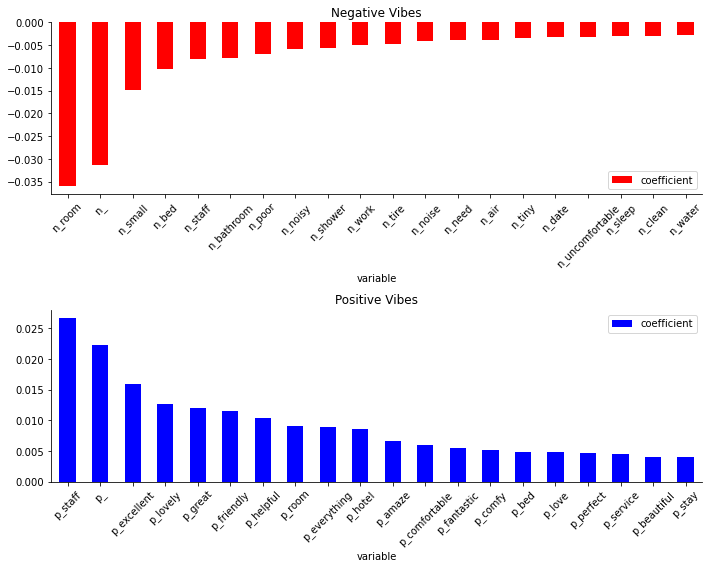

In [17]:
# Plot to get a sense of scale of positive and negative comment words and their coefficients
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Lowest 20 coefficients that predict a bad score from negative reviews
negreviews_coef.head(20).set_index('variable').plot(kind="bar", rot=45, ax=axs[0], color="red")
axs[0].set_title("Negative Vibes")

    
# largest coefficient -> tokens indicating positive sentiment 
posreviews_coef.head(20).set_index('variable').plot(kind="bar", rot=45, ax=axs[1], color="blue")
axs[1].set_title("Positive Vibes")
    
sns.despine()
plt.tight_layout()
plt.show()

I'm surprised that the cleaned dataset does not use n_grams, as many paired words seemed to have strong predictive power. However, there are some pretty clear indicators from positive vibe words - including 'excellent', 'lovely', 'great' that have a large impact on determining if a review is positive or negative. From negative indicators, words such as small, poor, noisy, noise, tiny seem to be strong negative indicators that lead to negative reviews.

### Dimensionality Reduction
To identify the most powerful variables, we will use a Principal Component Analysis (PCA) to reduce dimensionilty and variance. PCA is a dimensionality reduction method that can reduce the number of variables that are correlated with each other into fewer variables without still losing predictive impact of those variables. The PCA analysis works best on scaled data, so we will proceed first by scaling the data.


#### Scaling
While logistic regression models do not require data scaling, it is helpful when using a PCA dimensionality reduction technique, otherwise unscaled categories may have an overstated impact on the PCA model. Here we want to compare apples to apples. We will use the standard scaler that centers each attribute on 0 with a variance and standard deviation of 1, scaling all numerical columns within a range of -1 to 1.

When scaling, we will fit the scaler to our training data and *not* our test data to prevent leakage, but will transfom our X_train and X_test sets.

In [10]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on train set
scaler.fit(X_train)

# Transform and scale both X_train and X_test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### PCA Analysis

We will fit the PCA model to our scaled training data, and transform scaled X_train and Xtest. There is a tradeoff in choosing how many number of principal components we want to keep: A lower number means reducing more dimensions, however we may also lose information from those variables if dropped, reducing our model's predictive capacities. To choose the optimal number of PC's, we will make line plot of the explained variance ratio attribute.

In [11]:
from sklearn.decomposition import PCA

#Insantiate
my_PCA = PCA()

#Fit
my_PCA.fit(X_train_scaled)

#Transform
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

#Score

print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  20.884
Variance captured by PC2:  12.925
Proportion of variance captured by PC1:  0.008
Proportion of variance captured by PC2:  0.005


#### Analysis

Here, the proportion of variance captured by PC1 and PC2 tell us that .8% of the variation of the data is seen in the first PC, and .5% in the second. 

Reducing our total number of variables can be useful in reducing the runtime of our model. Below, we will explore the relationship between the number of dimensions and the run-time for a logistic regression.



In [12]:
#Create a for loop for number of variables, train a logmodel on each, record time to fit
#create range iterator
import time 

Num_Var = range(1, 2000, 50)
training_time = []

for n in Num_Var:

    #Insantiate
    my_PCA_timer = PCA(n_components = n)

    #Fit PCA
    my_PCA_timer.fit(X_train_scaled)

    #Transform to PCA
    X_train_PCA = my_PCA_timer.transform(X_train_scaled)
    
    #Start timer
    start_time = time.perf_counter()
    
    #Fit log model
    logreg.fit(X_train_PCA, y_train)
    
    #End and Append
    end_time = time.perf_counter()
    execute_time = end_time - start_time
    training_time.append(execute_time)



NameError: name 'logreg' is not defined

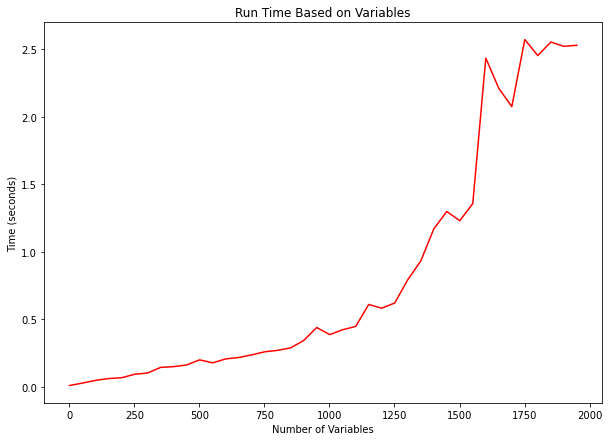

In [21]:
#plot the run time based on number of variables
plt.figure(figsize=(10,7))
plt.plot(Num_Var, training_time, color="red")
plt.ylabel("Time (seconds)")
plt.xlabel("Number of Variables")
plt.title("Run Time Based on Variables")
plt.show()

Based on the above graph, we can see that as number of variables incrase, run time starts to increase exponentially. We can therefore conclude that reducing variables can have a significant impact on total runtime.

##### Optimize
To find the optimal PCA reduction, we will plot the explained variance ratios above to find the optimal number of principal components. What we are looking for is the 'elbow' in the graph where the line begins to flatten, identifying diminishing returns from additional component reduction.

In [22]:
#Create variable for explained variance ratio
expl_var = my_PCA.explained_variance_ratio_

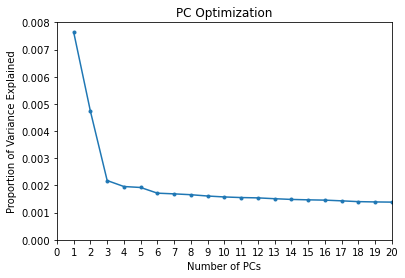

In [23]:
#Plot the Number of PCs in relation to Proportion of Variance Explained (expl_var)
plt.figure()
plt.plot(range(1,2744),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('PC Optimization')
plt.xticks(range(0,2744,1))
plt.axis([0, 20, 0 , .008])
plt.show()

Based on the PC/Variance Optimization graph, we can see that the 'elbow' is at about 6 PC's, with only minimal gain from thereon out. We will use 6 Principal Components for our analysis.

In [24]:
# Instantiate and fit PCA
my_PCA = PCA(n_components = 6)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

#Component Reduction
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

# Instantiate Log Model
logreg_PCA = LogisticRegression(solver='lbfgs')

# Fit Log Model
logreg_PCA.fit(X_train_PCA, y_train)


# Score
print(f"PCA Train score: {logreg_PCA.score(X_train_PCA, y_train)}")
print(f"PCA Test score: {logreg_PCA.score(X_test_PCA, y_test)}")

Original: (12798, 2743)
PCA Transformed: (12798, 6)
Train score: 0.7200343803719331
Test score: 0.7143191938129834


Compare the train and test scores above to the logreg regression model run at the beginning of this section presented here:

Train score (on all variables): 0.7238631036099391
Test score (on all variables: 0.7187719709397703

As we can see, our model lost only .0038 accuracy on the train score, and .0043 on the test score, showing very little decline in performance in the model despite radically reducing the amount of variables to 6.

In conclusion:

 - One advantage of using reduced dimensions is more efficient runtimes for our code. When implementing a model on very large datasets, this efficiency can be substantial. PCA can substantially reduce the number of variables to increase model performance without a significant loss of information.

 - One disadvantage, however, is that we lose some information as we drop the number of variables. We attempt to minimize the impact of information loss by optimizing our PCA model. Additionally, we lose some major interpretability of our model as we transform the variables. This matters in our ability to communicate our model to less technically sophisticated audiences.

## Question 2: K-Nearest Neighbor Model

After deploying our logistic regression model, we will now create a KNN model. For the KNN model, we will first instantiate/fit/score to find an accuracy score on the test set. As KNN is very computationally expensive, we will then illustrate how the number of observations in the dataset influences the run-time for KNN. Following this demonstration, we will then attempt to find the optimal value for K in the KNN algorithm.

####  KNN Model Work Flow
1) We will use the scaled data from the test/train split created above

2) Choose and Fit Model

3) Score the Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Test train split performed above
# Data scaled using standard scaler
# Fit with KNN model

# Instantiate
KNN_model = KNeighborsClassifier()
    
# Fit
KNN_model.fit(X_train_scaled, y_train)

# Score
train_accuracy = KNN_model.score(X_train_scaled, y_train)
test_accuracy = KNN_model.score(X_test_scaled, y_test)

In [15]:
# Print Results
print(f'The accuracy of the KNN model on our training data is: {train_accuracy}')
print(f'The accuracy of the KNN model on our test data is: {test_accuracy}')

The accuracy of the KNN model on our training data is: 0.751211126738553
The accuracy of the KNN model on our test data is: 0.6367471291305367


Based on the discrepancy between our training data accuracy and our test data accuracy, we may have some overfitting. Perhaps tinkering with our hyperparameters can increase the KNN model accuracy.  

#### KNN Model Efficiency
Prior to testing our hyperparameters, we will examine the relationship between the time to fit KNN models relative to the total number of observations. Since KNN algorithms are computationally expensive, we would expect that decreasing the number of observations will lead to better efficiency in fitting the KNN model.

In [16]:
# Create a for loop that iterates over different lengths
sample_size = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]
training_time = []
number_of_observations = []

for s in sample_size :

    #Create X_train_sample based on sample size s to test run length based on number of observations
    
    X_train_sample = X_train.sample(frac = s)
    y_train_sample = y_train.sample(frac = s)
    #Insantiate
    KNN_model_timer = KNeighborsClassifier()

    #Start timer
    start_time = time.perf_counter()
   
    #Fit log model
    KNN_model_timer.fit(X_train_sample, y_train_sample)
    
    #End and Append
    end_time = time.perf_counter()
    execute_time = end_time - start_time
    training_time.append(execute_time)
    number_of_observations.append(X_train_sample.shape[0])



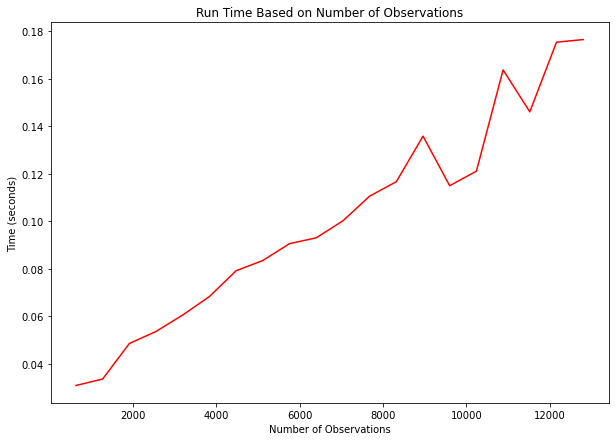

In [18]:
#plot the run time based on number of observations
plt.figure(figsize=(10,7))
plt.plot(number_of_observations, training_time, color="red")
plt.ylabel("Time (seconds)")
plt.xlabel("Number of Observations")
plt.title("Run Time Based on Number of Observations")
plt.show()

There is a direct relationship between the number of observations and the run time of the KNN algorithm: As the number of observations increases, so does the time to run the algorithm.  This relationship seems more linear than exponential.

Based on this observation, a benefit of decreasing our number of observations is that it is more computationally efficient, however a drawback of decreasing our number of observations would be information loss as the number of observations on which to train our model decreases, potentially impacting the model's accuracy.

#### Hyperparameter Optimization
We will now seek to optimize our hyperparameters for the KNN model, focusing on finding the optimal value for K (or number of neighbors). To do this, we will split our training test set into train and validation test sets rather than testing on our test set, then iterate across our sample to observe the relationship between k and the accuracy of our model. 

In [29]:
#Create 70% Train and 30% Validation Test Sets from our standard scaled X Train set and y train set
X_train1, X_validation1, y_train1, y_validation1 = \
    train_test_split(X_train_scaled, y_train, test_size = .3)

In [30]:
# Use our train and validation set to find an optimal KNN k variable.
KNN_train_acc = []
KNN_validation_acc = []
neighbors = range(1, 200, 2)

for n in neighbors: 
    
    #Instantiate and Fit
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train1, y_train1)
    
    
    #Score the model
    train_accuracy = KNN_model.score(X_train1, y_train1)
    validation_accuracy = KNN_model.score(X_validation1, y_validation1)
    
    
    #Append my accuracy
    KNN_train_acc.append(train_accuracy)
    KNN_validation_acc.append(validation_accuracy)



In [19]:
#plot the graph
plt.figure(figsize=(10,7))
plt.plot(neighbors, KNN_validation_acc, color="red", label="validation")
plt.plot(neighbors, KNN_train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.title("KNN Optimization")
plt.legend()
plt.show()

NameError: name 'neighbors' is not defined

<Figure size 720x504 with 0 Axes>

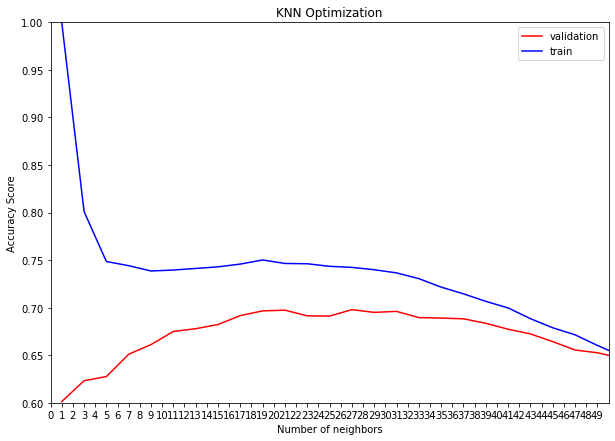

In [33]:
# Zoom in on the axis

plt.figure(figsize=(10,7))
plt.plot(neighbors, KNN_validation_acc, color="red", label="validation")
plt.plot(neighbors, KNN_train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.xticks(range(0,50,1))
plt.axis([0, 50, .6, 1])
plt.title("KNN Optimization")
plt.legend()
plt.show()

#### Optimal K
Based on the graph above, we see overfitting for k less than 9. The best values are when train and test accuracy are close and test accuracy is maximal, which seems to be about 27 neighbors.

#### Order of operations (question 2.e)
Applying the fit method of the vectorizer before the train/validation split can introduce data leakage. In general, our model should never see the data it will be tested on. So having done the vectorizer before the split, we introduce some bias into our model, making it more brittle.

## Question 3: Decision Tree Classifier
We will now move from our logistic and KNN model to a decision tree classifier.  We must be careful, because decision trees have a tendency to overfit.  Our process will include fitting a decision tree to the data and reporting the accuracy score of the tree, split our data into test and validation sets, and then find an optimal depth of the decision tree. We will then discuss the advantages of decision trees over KNN models, and two weaknesses of the Decision Tree model.

In [34]:
# IFS Decision Tree Model on Train and Test split
from sklearn.tree import DecisionTreeClassifier

#Will use the original train/test split
#Will use X_train and X_test data, as DTs are not sensitive to variance

# instantiate
rating_dt = DecisionTreeClassifier()

# fit

rating_dt.fit(X_train, y_train)
    
# score
    
print(f'The Decision Tree classifier training accuracy score: {rating_dt.score(X_train, y_train)}')
print(f'The Decision Tree classifier test accuracy score: {rating_dt.score(X_test, y_test)}')


The Decision Tree classifier training accuracy score: 1.0
The Decision Tree classifier test accuracy score: 0.70611670963206


Analysis: The Decision Tree Classifier did what decision trees do: overfit. It memorized the training data, creating a perfect training accuracy score, but only a 70.6% accuracy score on our test data. The DTC requires some hyperparameter optimization to prevent overfitting.

#### Optimize Hyperparameters
We will now seek to optimize the hyperparameters of our Decision Tree Classifier model. To lower the total processing time, we will first take a sample of the dataset, then create a train and validation set, iterate across a range of tree depths to assess accuracy on the train and validation sets, and then select a optimized hyperparameter.

In [35]:
# Take a 75% sample from the X_train and y_train dataframe
X_train_DT = df_train.drop('rating', axis=1)
y_train_DT = df_train['rating']


X_train_DTsample = X_train_DT.sample(frac = .75)
y_train_DTsample = y_train_DT.sample(frac = .75)
print(X_train_DTsample.shape)
print(y_train_DTsample.shape)

(9598, 2743)
(9598,)


In [36]:
#Create 70% Train and 30% Validation Test Sets from our sampled standard scaled X Train set and y train set
X_train_dt, X_validation_dt, y_train_dt, y_validation_dt = \
    train_test_split(X_train_DTsample, y_train_DTsample, test_size = .3)

In [37]:
# Iterate models of different depths to track the accuracy of different tree depths
DTtrain_accs = []
DTvalidation_accs = []

for i in range(1,60):
    
    # instantiate
    optimize_dt = DecisionTreeClassifier(max_depth = i)
    optimize_dt.fit(X_train_dt, y_train_dt)
    
    # score
    
    DTtrain_accs.append(optimize_dt.score(X_train_dt, y_train_dt))
    DTvalidation_accs.append(optimize_dt.score(X_validation_dt, y_validation_dt))
    


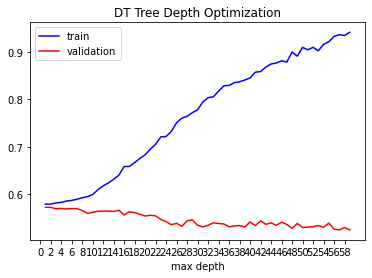

In [38]:
# plot the optimal depth

plt.figure()
plt.plot(range(1,60), DTtrain_accs,c = 'blue', label = 'train')
plt.plot(range(1,60), DTvalidation_accs,c = 'red', label = 'validation')
plt.xlabel("max depth")
plt.legend()
plt.title('DT Tree Depth Optimization')
plt.xticks(range(0,60,2))
plt.show()

#### Analysis

Decision Tree models have a tendency to overfit or 'memorize' the training data. We can see this by how training data increases towards very high accuracy rates even as the validation accuracy score falls. Based on the graph, we want to find the location where the training and validation sets are closest together, minimizing overfitting tendencies. For our final model, we will use a max_depth = 7. Curious to test this, skip to question 4 for answers to questions asked if the reader wants.

In [50]:
# instantiate
rating_dt2 = DecisionTreeClassifier(max_depth = 7)

# fit

rating_dt2.fit(X_train, y_train)
    
# score
    
print(f'The Decision Tree classifier training accuracy score: {rating_dt2.score(X_train, y_train)}')
print(f'The Decision Tree classifier test accuracy score: {rating_dt2.score(X_test, y_test)}')


The Decision Tree classifier training accuracy score: 0.7767619940615721
The Decision Tree classifier test accuracy score: 0.7558003280993673


## Question 4:

The validation set's purpose is hyperparameter optimization. We use the validation set for this purpose because we do not want to introduce an unfinished model to our test set. If we are fine-tuning our hyperparameters based on our test rather than validation set, we are essentially cheating, creating a more brittle model tuned to *this particular* test set. This may lead to a less robust model when brought into production. As a rule, we want to keep the train and test set seperate until our model is complete to prevent data leakage and to assess the overall accuracy of our model.

## Question 5: Models with Cross Validation for Hyperparameter Optimization

Models have a tendnecy to overfit, memorizing our training data and creating significant bias.  This lowers our ability to analyze greater variability. To create a more balanced model, we need to optimize our hyperparameters. However, there can also be significant inaccuracies in hyperparameter optimization based on the train/validation splits we create. If we only optimize hyperparameters on one split, we may fail to fine-tune our model given the chance of non-representative splits (based purely on chance). To correct for this, we can use cross-validation for hyperparameter optimization. K-fold cross validation works by creating multiple train/validation splits and fine-tuning our hyperparameters for each, and then creating a cross-validation score that averages optimal hyperparameters based on each iteration through train/validate splits.

We will use cross validation to find the optimal parameter for a logistic regression. The main parameter to be adjusted is the C score, a penalty used in logistic regression to determine the strength to give to testing data. Lower C values essentially tell the model to not overweight particular variables, dampening their overall impact and increasing the model's variance (lower bias).

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
X_traincv = df_train.drop('rating', axis=1)
y_traincv = df_train['rating']



In [67]:
# Use Cross Validation on a Logistic Model to select optimal C - hyperparameter
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001, .01, .1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(solver='lbfgs', C=c)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_traincv, y_traincv, cv = 5))
    
    cross_validation_scores.append(cv_score)



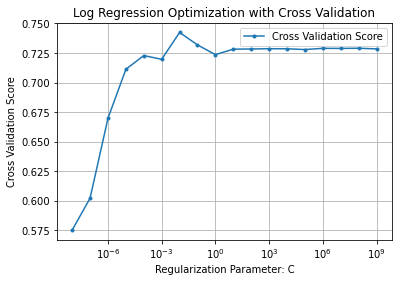

In [68]:
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.title('Log Regression Optimization with Cross Validation')
plt.grid()
plt.show()

##### Analysis 
Based on our crss validation score, the C parameter's optimal position is 0.01, indicating that a lower C parameter creates a optimal logistic regression model. We will now #FIS using the hyperparameter used below to then create a confusion matrix.



In [72]:
# Instantiate

logreg_opt = LogisticRegression(solver='lbfgs', C = 0.01 )

# Fit log regression model to the training data
logreg_opt.fit(X_traincv, y_traincv)

# Score
print(f"Train score: {logreg_opt.score(X_traincv, y_traincv)}")
print(f"Test score: {logreg_opt.score(X_test, y_test)}")


Train score: 0.7358962337865291
Test score: 0.7335364424654324


#### Confusion Matrix

We will now create a confusion matrix based on our optimal hyperparameter derived from the cross-validation process. A confusion matrix is a display of precision and recall within our model. In a logistic regression model, a confusion matrix visualizes how many times our model predicted a 'bad' rating when the rating was actually bad (true negative), how many times it predicted a bad rating when it was actually good (false negative), how many times it predicted a good rating when it was actually bad (false positives), and finally how many times it predicted a good rating and it was actually good (true positive).

Precision is simply True Positives/(True Positives + False Positives), and Recall is True Positives/(True Positives + False Negatives).

In [57]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Retrieve y predictions
y_pred = logreg_opt.predict(X_test)

#Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

cf_matrix

array([[ 986,  823],
       [ 378, 2080]], dtype=int64)

In [58]:
# Get Classification report
log_report = classification_report(y_test, y_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.72      0.55      0.62      1809
           1       0.72      0.85      0.78      2458

    accuracy                           0.72      4267
   macro avg       0.72      0.70      0.70      4267
weighted avg       0.72      0.72      0.71      4267



In [59]:
precision_hand = 2080/(823+2080)
recall_hand = 2080/(2080+378)
print(precision_hand, recall_hand)

0.7165001722356183 0.8462164361269324


The confusion matrix above shows that our precision score for predicting a good rating is .72, our recall rate is .85, and our F1-score is .78. Right now, our higher f1 score for the positive class indicates our model does a better job of predicting 'good' ratings compared to accurately predicting 'bad' ratings.

## Question 6: Feature Engineering

We will now create a new feature of our choice to add to the existing features.  I will first create a feature and explain why I believe it will increase accuracy of the model. We will then add this to our features, re-optimize our hyperparameters, and assess the impact on the accuracy of the model.

In [60]:
pd.set_option('display.max_columns', None)

df_train.head(15)

Additional_Number_of_Scoring  Average_Score  \
0                            620            9.0   
1                           1258            9.4   
2                            995            8.1   
3                            853            8.4   
4                           1243            8.1   
5                           1936            8.7   
6                           1172            7.8   
7                           1258            9.4   
8                            854            7.8   
9                            256            8.8   
10                           954            8.6   
11                          1274            7.7   
12                           301            8.8   
13                            68            9.6   
14                           346            9.0   

    Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   0                     1974   
1                                   6                     4204   
2                                   2                     3826   
3                                   7                     2726   
4                                  11                     6608   
5                                  13                     7491   
6                                  49                     5945   
7                                   9                     4204   
8                                   5                     3867   
9                                  15                     1268   
10                                 12                     4426   
11                                  0                     6539   
12                                 70                     1071   
13                                  0                      255   
14                                  2                     1283   

    Review_Total_Positive_Word_Counts  \
0                                 164   
1                                   4   
2                                  38   
3                                  10   
4                                   8   
5                                   7   
6                                   4   
7                                  40   
8                                   7   
9                                   7   
10                                 11   
11                                111   
12                                  0   
13                                 26   
14                                  8   

    Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                            1                562  51.506558   
1                                            5                276  51.502435   
2                                            1                129  51.504348   
3                                           10                164  51.507377   
4                                           69                639  51.513556   
5                                           10                702  51.510841   
6                                           17                366  51.499981   
7                                            1                 31  51.502435   
8                                            1                268  51.494231   
9                                            2                241  51.494432   
10                                          11                302  51.494254   
11                                           1                 27  51.510995   
12                                           1                 89  51.468956   
13                                           2                372  51.508460   
14                                          30                646  51.517283   

         lng  weekday_of_review  month_of_review  year_of_review  bed_single  \
0  -0.004514                  1                1            2016           0   
1  -0.000250                  0 

Based on our analysis of coefficients after our first logistic regression, we found that word count of review is strongly predictive, both positive for positive reviews and negatively for negative reviews. Perhaps there is a way to magnify these feature's predictive power.

Thinking logically about the length of reviews, negative reviews would probably have far longer negative review word counts than positive review word counts and vice versa. To give a hotel a negative review, the commenter would probably spend more time on why the experience was negative rather than time spent describing why it was positive, and again the inverse (positive reviews would probably have a higher positive word count). I will create a feature that takes the ratio of word count for positive reviews to negative reviews, and then set a binary at a threshold for this ratio.

new column name = 'ratio_good_to_bad_words'
will add one to each column to account for 0's: (`Review_Total_Positive_Word_Counts` + 1)/(`Review_Total_Negative_Word_Counts`+1)
Ratio >20, or, to be scored as a one, the positive review must be 20x longer than the negative review.

In [77]:
#Create by X_train for my feature engineering set

X_trainfe = df_train.drop('rating', axis=1)
y_trainfe = df_train['rating']

X_testfe = df_test.drop('rating', axis=1)
y_testfe = df_test['rating']

In [78]:
#Add new feature to train set

X_trainfe['ratio_good_to_bad_words'] = \
    ((X_trainfe['Review_Total_Positive_Word_Counts'] + 1/X_trainfe['Review_Total_Negative_Word_Counts'] + 1) > 20).astype(int)

#Add new feature to test set
X_testfe['ratio_good_to_bad_words'] = \
    ((X_trainfe['Review_Total_Positive_Word_Counts'] + 1/X_trainfe['Review_Total_Negative_Word_Counts'] + 1) > 20).astype(int)

#confirm column worked and works as intended
X_trainfe.head()

Additional_Number_of_Scoring  Average_Score  \
0                           620            9.0   
1                          1258            9.4   
2                           995            8.1   
3                           853            8.4   
4                          1243            8.1   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  0                     1974   
1                                  6                     4204   
2                                  2                     3826   
3                                  7                     2726   
4                                 11                     6608   

   Review_Total_Positive_Word_Counts  \
0                                164   
1                                  4   
2                                 38   
3                                 10   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                           1                562  51.506558   
1                                           5                276  51.502435   
2                                           1                129  51.504348   
3                                          10                164  51.507377   
4                                          69                639  51.513556   

        lng  weekday_of_review  month_of_review  year_of_review  bed_single  \
0 -0.004514                  1                1            2016           0   
1 -0.000250                  0               10            2016           0   
2 -0.033444                  0                3            2017           0   
3  0.038657                  0                2            2017           0   
4 -0.180002                  1               11            2015           0   

   bed_double  bed_queen  bed_king  trip_leisure  trip_biz  group_solo  \
0           0          0         0             1         0           0   
1           0          0         0             1         0           0   
2           0          0         0             1         0           0   
3           0          0         0             1         0           0   
4           0          0         0             0         1           0   

   group_couple  group_family  Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0             1             0                              0              0   
1             0             0                              0              0   
2             1             0                              0              0   
3             1             0                              0              0   
4             0             0                              0              0   

   Hotel_Name_88 Studios  Hotel_Name_Ace Hotel London Shoreditch  \
0                      0                                       0   
1                      0                                       0   
2                      0                                       0   
3                      0                                       0   
4                      0                                       0   

   Hotel_Name_Adria Boutique Hotel  Hotel_Name_Aloft London Excel  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Hotel_Name_Amba Hotel Charing Cross  Hotel_Name_Amba Hotel Marble Arch  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                              

In [66]:
# Hyperparameter optimization

# Use Cross Validation on a Logistic Model to select optimal C - hyperparameter
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001, .01,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(solver='lbfgs', C=c)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_trainfe, y_trainfe, cv = 5))
    
    cross_validation_scores.append(cv_score)


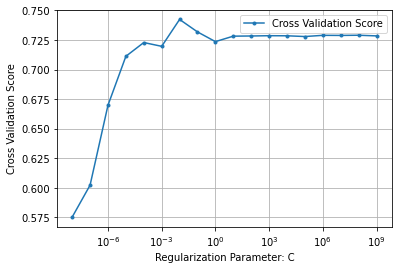

In [69]:
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

Adding the new feature did not alter our optimal C hyperparameter, keeping it at 0.01. We will now test and score the model.

In [79]:
# IFS optimized model
# Instantiate

logreg_final = LogisticRegression(solver='lbfgs', C = 0.01 )

# Fit log regression model to the training data
logreg_opt.fit(X_trainfe, y_trainfe)

# Score
print(f"Train score: {logreg_opt.score(X_trainfe, y_trainfe)}")
print(f"Test score: {logreg_opt.score(X_testfe, y_testfe)}")

Train score: 0.7223003594311611
Test score: 0.7194750410124209


No, we actually saw a net decline in our model's performance by a near full percentage point. This could be a matter of different train set.

## Conclusion

During this assignment, we created a logistic regression, K-Nearest Neighbor, and Decision Tree classification models. Of the three models tested and the logistic regression with a engineered feature, the Decision Tree Classifier had the highest accuracy score. I would be curious to see how a random forest model would perform. In each, we explored how different factors impact the efficiency of the algorithm, how to identify the most optimal hyperparameters, and/or create features that impact the predictive accuracy of our model.
